In [1]:
from pathlib import Path
import os, sys
import pandas as pd

path = Path(os.getcwd())
backtest_scripts = str(path.parent.absolute())+"/backtest"
os.chdir(backtest_scripts)
if backtest_scripts not in sys.path:
    sys.path.append(backtest_scripts)
 
from cerebro import CerebroBT
from backtrader.feeds import BacktraderCSVData
import backtrader as bt
# cerebro class
cerebro_class = CerebroBT()
cerebro = cerebro_class.create_cerebro()

In [2]:
# before adding data, add strategy to cerebro - any strategy provided by backtrader
data_path = str(path.parent.absolute())+'/data/JPY=X.csv'

from rsi_strategy import RSI

cerebro.addstrategy(RSI)

0

In [3]:
# data from CSV file - using days as time frame
# can be any yahoo finance csv data file - provide file path

fin_data = BacktraderCSVData(dataname=data_path, timeframe=bt.TimeFrame.Days)
# add data to cerebro
cerebro_class.feed_cerebro(fin_data, cerebro)

# BACKTESTING METRICS
1) return
2) Number of trades
3) Winning trades
4) Losing trades
5) Max drawdown
6) Sharpe ratio

## Sharpe ratio

In [4]:
startcash = 100000
cerebro.broker.setcash(startcash)
# after adding the strategy to cerebro
# add sharpe ratio metric to evaluate the strategy added (in this case - OBV)
from backtrader import analyzers
cerebro_class.add_metrics(analyzers.SharpeRatio, bt.TimeFrame.Minutes, cerebro,'sharpe_ratio')
backtrading_result = cerebro.run()
sharpe_ratio = cerebro_class.get_sharpe_ratio(backtrading_result[0])
print(sharpe_ratio)

None


## Return

In [5]:
# adding PyFolio analyzer - a Python library for performance and risk analysis of financial
#                           portfolios
# Add the PyFolio analyzer to the cerebro mix
cerebro.addanalyzer(bt.analyzers.PyFolio)
# get results of run
strategies_performed = cerebro.run()
first_strategy = strategies_performed[0] # OBV strategy
pyfolio_metrics = first_strategy.analyzers.getbyname('pyfolio') # pyfolio metrics
returns, positions, transactions, gross_lev = pyfolio_metrics.get_pf_items() # dataframe objects
print(returns.describe())

count    262.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: return, dtype: float64


## Number of trades

In [6]:
# adding another analyzer for counting number of trades - need brokers?
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trades")
# if no trades are executed, no statistics will be generated
trade_results = cerebro.run()
trade_results[0].analyzers.getbyname("trades").get_analysis()

AutoOrderedDict([('total', AutoOrderedDict([('total', 0)]))])

In [7]:
# number of trades becomes
trade_results[0].analyzers.getbyname("trades").get_analysis()['total']['total']

0

## Winning trades

In [ ]:
# if trades were performed then we could get losing and winning trades
trade_results[0].analyzers.getbyname("trades").get_analysis()['won']['total']

## Losing trades

In [ ]:
# if trades were performed then we could get losing and winning trades
trade_results[0].analyzers.getbyname("trades").get_analysis()['lost']['total']

In [9]:
cerebro.broker.getvalue()

100000.0

## Max Drawdown

In [10]:
cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown")
drawdown_res = cerebro.run()
drawdown_res[0].analyzers.getbyname("drawdown").get_analysis()

AutoOrderedDict([('len', 0),
                 ('drawdown', 0.0),
                 ('moneydown', 0.0),
                 ('max',
                  AutoOrderedDict([('len', 0.0),
                                   ('drawdown', 0.0),
                                   ('moneydown', 0.0)]))])

In [11]:
drawdown_res[0].analyzers.getbyname("drawdown").get_analysis()['drawdown']

0.0

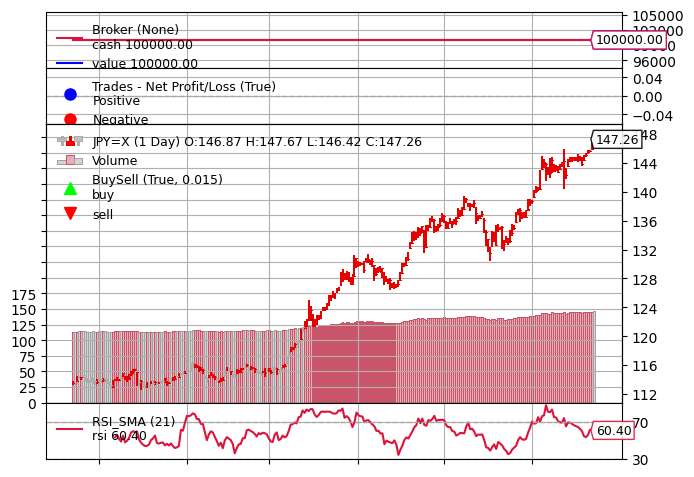

In [12]:
%matplotlib inline
cer_plot = cerebro.plot(style='candlestick',iplot= False) # not an interactive plot
cer_plot[0][0]